# ANALISTA DE PLANEJAMENTO (SIMULAÇÃO)

**Case:** A empresa ferroviária X é responsável pelo transporte de diferentes cargas para o porto Y, que apresenta diariamente diversos problemas operacionais. Como membro da equipe de planejamento e simulação, você recebe os dados históricos da descarga dos vagões nos terminais portuários em um arquivo com formato "txt" e precisa concluir as seguintes tarefas:

---

## 1. Realizar a análise dos dados históricos da descarga dos vagões. Registre de forma apropriada:

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ler arquivo .txt
path = r'C:\Users\alves\OneDrive\Desktop\case_FIPS\case_selecao_analista_simulacao.txt'
df = pd.read_csv(path, delimiter=';', encoding='latin1')
print(df.head())

  Terminal      Moega  ID Vagão Produto      Chegada_Trem Data/Hora Encoste  \
0      DDD  Moega LLL   2199871    Soja  23/01/2022 18:09  23/01/2022 19:09   
1      DDD  Moega LLL    993110    Soja  23/01/2022 18:09  23/01/2022 19:09   
2      DDD  Moega LLL   4374790    Soja  23/01/2022 18:09  23/01/2022 19:09   
3      DDD  Moega LLL   3972880    Soja  23/01/2022 18:09  23/01/2022 19:09   
4      DDD  Moega LLL   6643027    Soja  23/01/2022 18:09  23/01/2022 19:09   

  Data/Hora Início Descarga Data/Hora Fim Descarga  
0          23/01/2022 19:25       23/01/2022 19:31  
1          23/01/2022 19:27       23/01/2022 19:32  
2          23/01/2022 19:27       23/01/2022 19:33  
3          23/01/2022 19:39       23/01/2022 19:51  
4          23/01/2022 19:40       23/01/2022 19:51  


---

### 1.1 A quantidade diária de vagões descarregada em cada terminal

In [3]:
# Converter a coluna 'Data/Hora Fim Descarga' para datetime
df['Data/Hora Fim Descarga'] = pd.to_datetime(df['Data/Hora Fim Descarga'], dayfirst=True, errors='coerce')

# Criar uma nova coluna apenas com a data da descarga
df['Data Descarga'] = df['Data/Hora Fim Descarga'].dt.date

# Contar a quantidade de vagões descarregados por dia e terminal
contagem_vagoes = df.groupby(['Terminal', 'Data Descarga']).size().reset_index(name='Quantidade Vagões')

# Exibir o resultado
print(contagem_vagoes.head())

  Terminal Data Descarga  Quantidade Vagões
0      DDD    2022-01-02                 70
1      DDD    2022-01-03                  3
2      DDD    2022-01-04                 63
3      DDD    2022-01-05                 58
4      DDD    2022-01-06                 84


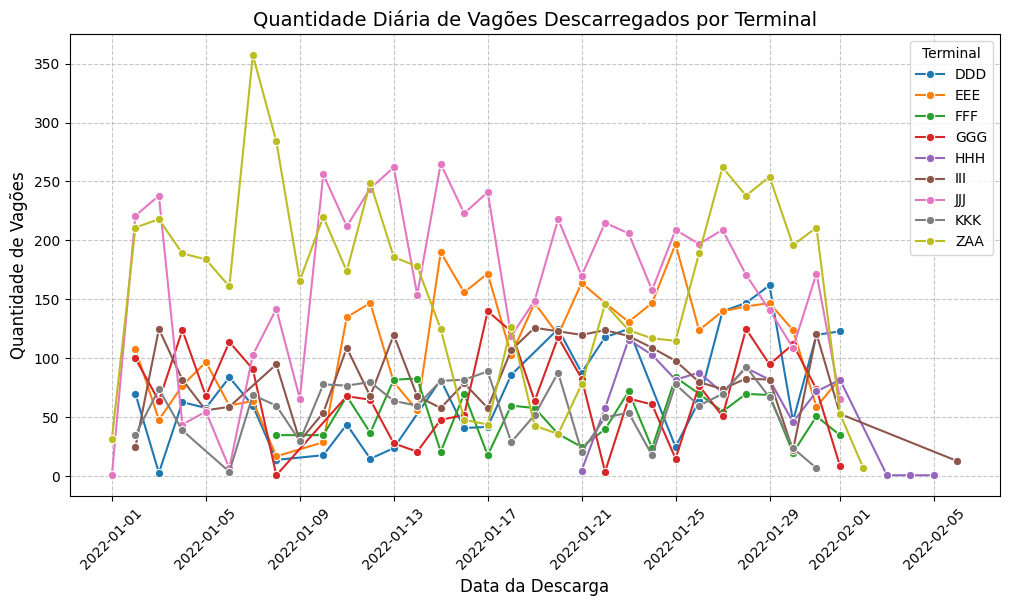

In [4]:
# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=contagem_vagoes, x='Data Descarga', y='Quantidade Vagões', hue='Terminal', marker='o', palette='tab10')

# Personalizar o gráfico
plt.xlabel('Data da Descarga', fontsize=12)
plt.ylabel('Quantidade de Vagões', fontsize=12)
plt.title('Quantidade Diária de Vagões Descarregados por Terminal', fontsize=14)
plt.xticks(rotation=45)  # Rotacionar datas no eixo X para melhor leitura
plt.legend(title='Terminal')  # Adicionar legenda
plt.grid(True, linestyle='--', alpha=0.7)

---

### 1.2 O terminal com a maior e a menor quantidade de vagões descarregados no período dos dados

In [5]:
# Somar o total de vagões descarregados por terminal no período
total_vagoes_por_terminal = contagem_vagoes.groupby('Terminal')['Quantidade Vagões'].sum()

# Encontrar o terminal com maior e menor quantidade total de vagões descarregados
terminal_max = total_vagoes_por_terminal.idxmax()
terminal_min = total_vagoes_por_terminal.idxmin()

max_vagoes = total_vagoes_por_terminal.max()
min_vagoes = total_vagoes_por_terminal.min()

# Exibir os resultados
print(f"- Terminal com MAIS vagões descarregados: {terminal_max} ({max_vagoes} vagões)")
print(f"- Terminal com MENOS vagões descarregados: {terminal_min} ({min_vagoes} vagões)")

- Terminal com MAIS vagões descarregados: JJJ (5243 vagões)
- Terminal com MENOS vagões descarregados: HHH (900 vagões)


---

### 1.3 o terminal com a maior variação diária na quantidade de vagões descarregados, avaliando o desvio padrão e a quantidade de outliers.

Terminal
DDD    45.646761
EEE    47.345162
FFF    21.658947
GGG    39.288249
HHH    39.801292
III    33.804275
JJJ    75.032943
KKK    25.826486
ZAA    83.851070
Name: Quantidade Vagões, dtype: float64
- Terminal com MAIOR variação diária: ZAA (Desvio padrão: 83.85)
- Quantidade de outliers detectados: 3


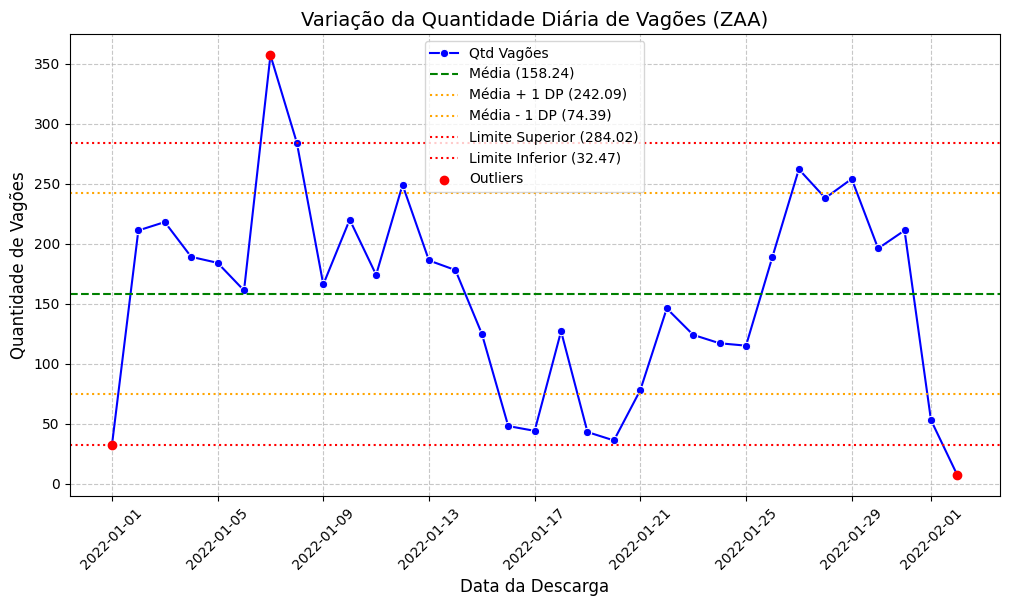

In [6]:
# Calcular o desvio padrão da quantidade de vagões por terminal
desvios_por_terminal = contagem_vagoes.groupby('Terminal')['Quantidade Vagões'].std()
print(desvios_por_terminal)

# Identificar o terminal com maior variação
terminal_mais_variavel = desvios_por_terminal.idxmax()
desvio_padrao_max = desvios_por_terminal.max()

print(f"- Terminal com MAIOR variação diária: {terminal_mais_variavel} (Desvio padrão: {desvio_padrao_max:.2f})")

# Filtrar os dados desse terminal
dados_terminal = contagem_vagoes[contagem_vagoes['Terminal'] == terminal_mais_variavel].copy()

# Calcular a média e o desvio padrão
media_terminal = dados_terminal['Quantidade Vagões'].mean()
desvio_terminal = dados_terminal['Quantidade Vagões'].std()

# Definir o número de desvios padrão para considerar como outliers
n_desvios_padrao = 1.5

# Definir limites para outliers (média ± n * desvio padrão)
limite_superior = media_terminal + n_desvios_padrao * desvio_terminal
limite_inferior = media_terminal - n_desvios_padrao * desvio_terminal

# Identificar outliers
dados_terminal.loc[:, 'Outlier'] = (dados_terminal['Quantidade Vagões'] < limite_inferior) | (dados_terminal['Quantidade Vagões'] > limite_superior)
quantidade_outliers = dados_terminal['Outlier'].sum()

print(f"- Quantidade de outliers detectados: {quantidade_outliers}")

# Criar gráfico de linha com média, desvio padrão e outliers
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_terminal, x='Data Descarga', y='Quantidade Vagões', marker='o', label='Qtd Vagões', color='blue')
plt.axhline(media_terminal, color='green', linestyle='--', label=f'Média ({media_terminal:.2f})')
plt.axhline(media_terminal + desvio_terminal, color='orange', linestyle=':', label=f'Média + 1 DP ({media_terminal + desvio_terminal:.2f})')
plt.axhline(media_terminal - desvio_terminal, color='orange', linestyle=':', label=f'Média - 1 DP ({media_terminal - desvio_terminal:.2f})')
plt.axhline(limite_superior, color='red', linestyle=':', label=f'Limite Superior ({limite_superior:.2f})')
plt.axhline(limite_inferior, color='red', linestyle=':', label=f'Limite Inferior ({limite_inferior:.2f})')

# Personalizar o gráfico
outlier_data = dados_terminal[dados_terminal['Outlier']]
plt.scatter(outlier_data['Data Descarga'], outlier_data['Quantidade Vagões'], color='red', label='Outliers', zorder=3)
plt.xlabel('Data da Descarga', fontsize=12)
plt.ylabel('Quantidade de Vagões', fontsize=12)
plt.title(f'Variação da Quantidade Diária de Vagões ({terminal_mais_variavel})', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

---

## 2. Adicionar indicadores e informações que julgar relevantes para a análise dos dados, além do que já foi mencionado anteriormente.

### 2.1 Total de vagões por Estação por Mês
Agrupar os dados por períodos maiores pode fornecer uma visão de tendências e variações ao longo do tempo, facilitando a identificação de sazonalidades ou padrões mensais.

In [7]:
# Adicionar a coluna 'Mês' e calcular o total de vagões por mês
contagem_vagoes['Data Descarga'] = pd.to_datetime(contagem_vagoes['Data Descarga'], format='%d/%m/%Y')
contagem_vagoes['Mês'] = contagem_vagoes['Data Descarga'].dt.to_period('M')
total_vagoes_por_mes = contagem_vagoes.groupby(['Terminal', 'Mês'])['Quantidade Vagões'].sum().reset_index()
print(total_vagoes_por_mes)

   Terminal      Mês  Quantidade Vagões
0       DDD  2022-01               1865
1       DDD  2022-02                123
2       EEE  2022-01               3330
3       EEE  2022-02                 83
4       FFF  2022-01               1218
5       FFF  2022-02                 35
6       GGG  2022-01               2052
7       GGG  2022-02                  9
8       HHH  2022-01                815
9       HHH  2022-02                 85
10      III  2022-01               2474
11      III  2022-02                 66
12      JJJ  2022-01               5177
13      JJJ  2022-02                 66
14      KKK  2022-01               1633
15      ZAA  2022-01               5162
16      ZAA  2022-02                 60


---

### 2.2 Total Acumulado por Mês

       Mês  Quantidade Vagões
0  2022-01              23726
1  2022-02                527


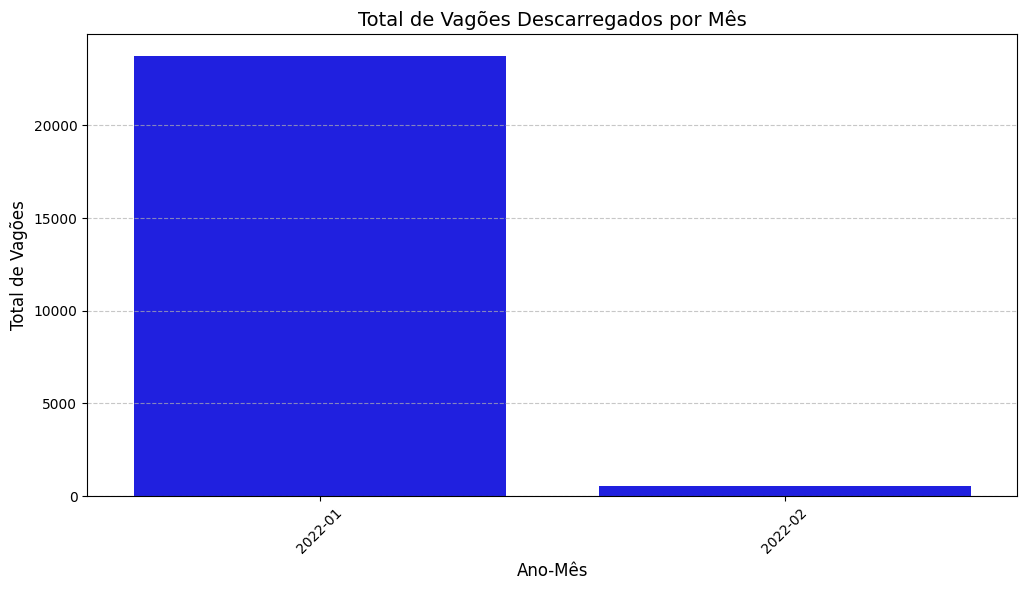

In [8]:
# Agrupar os dados para obter o total de vagões por mês
total_vagoes_mensal = contagem_vagoes.groupby('Mês')['Quantidade Vagões'].sum().reset_index()
print(total_vagoes_mensal)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=total_vagoes_mensal, x='Mês', y='Quantidade Vagões', color='blue')

# Personalizar o gráfico
plt.xlabel('Ano-Mês', fontsize=12)
plt.ylabel('Total de Vagões', fontsize=12)
plt.title('Total de Vagões Descarregados por Mês', fontsize=14)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

---

### 2.3 Taxa de variação diária para cada terminal
A taxa de variação diária permite observar a flutuação da quantidade de vagões descarregados de um dia para o outro. Se a variação for muito grande, pode indicar uma irregularidade ou um evento específico (ex: aumento ou queda na demanda).

In [9]:
contagem_vagoes['Variação Diária'] = contagem_vagoes.groupby('Terminal')['Quantidade Vagões'].pct_change() * 100
print(contagem_vagoes[['Terminal', 'Data Descarga', 'Variação Diária']])


    Terminal Data Descarga  Variação Diária
0        DDD    2022-01-02              NaN
1        DDD    2022-01-03       -95.714286
2        DDD    2022-01-04      2000.000000
3        DDD    2022-01-05        -7.936508
4        DDD    2022-01-06        44.827586
..       ...           ...              ...
246      ZAA    2022-01-29         6.722689
247      ZAA    2022-01-30       -22.834646
248      ZAA    2022-01-31         7.653061
249      ZAA    2022-02-01       -74.881517
250      ZAA    2022-02-02       -86.792453

[251 rows x 3 columns]


---

### 2.4 Média diária de vagôes (dias úteis x fim de semana)
Verificar a diferença de descarregamentos entre dias úteis e fins de semana pode revelar padrões operacionais importantes, como a necessidade de otimizar operações em certos dias ou a identificação de picos inesperados durante o fim de semana.

       Mês  Categoria Dia  Quantidade Vagões  Dias  Média Diária de Vagões
0  2022-01     Dias Úteis              16613    21              791.095238
1  2022-01  Fim de Semana               7113    10              711.300000
2  2022-02     Dias Úteis                513     4              128.250000
3  2022-02  Fim de Semana                 14     2                7.000000


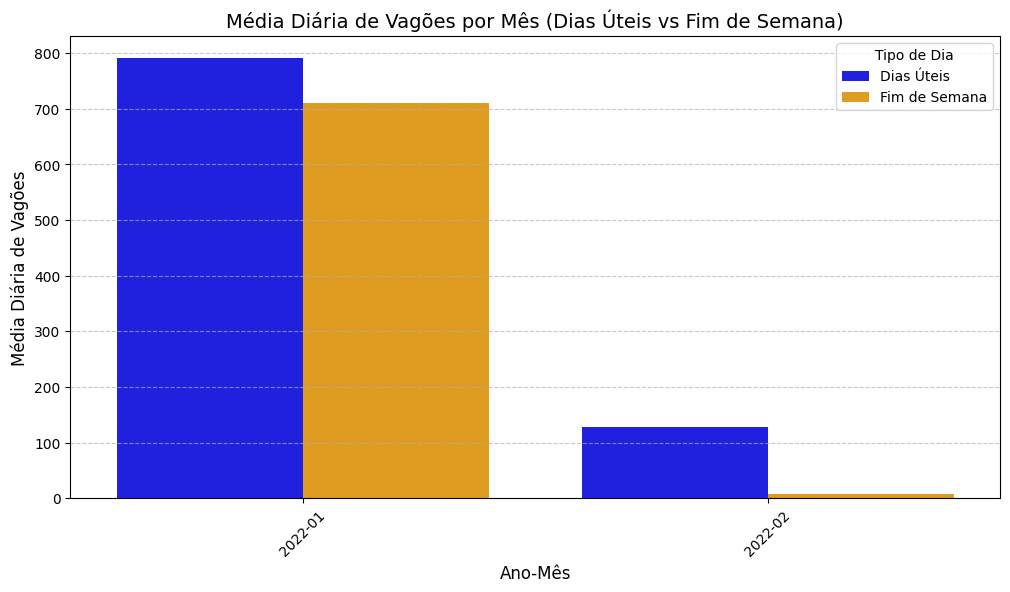

In [10]:
# Criar uma coluna indicando se é dia útil ou fim de semana
contagem_vagoes['Categoria Dia'] = np.where(contagem_vagoes['Data Descarga'].dt.weekday < 5, 'Dias Úteis', 'Fim de Semana')

# Somar a quantidade de vagões por mês e categoria de dia
total_vagoes_mensal = contagem_vagoes.groupby(['Mês', 'Categoria Dia'])['Quantidade Vagões'].sum().reset_index()

# Contar quantos dias úteis e fins de semana existem em cada mês
dias_categoria_mensal = contagem_vagoes.groupby(['Mês', 'Categoria Dia'])['Data Descarga'].nunique().reset_index()
dias_categoria_mensal.rename(columns={'Data Descarga': 'Dias'}, inplace=True)

# Juntar os dados para calcular a média diária
media_vagoes_mensal = pd.merge(total_vagoes_mensal, dias_categoria_mensal, on=['Mês', 'Categoria Dia'])
media_vagoes_mensal['Média Diária de Vagões'] = media_vagoes_mensal['Quantidade Vagões'] / media_vagoes_mensal['Dias']
print(media_vagoes_mensal)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=media_vagoes_mensal, x='Mês', y='Média Diária de Vagões', hue='Categoria Dia', palette=['blue', 'orange'])

# Personalizar o gráfico
plt.xlabel('Ano-Mês', fontsize=12)
plt.ylabel('Média Diária de Vagões', fontsize=12)
plt.title('Média Diária de Vagões por Mês (Dias Úteis vs Fim de Semana)', fontsize=14)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X para melhor leitura
plt.legend(title='Tipo de Dia')  # Adicionar legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

---

## 3. Exportar os dados consolidados de quantidade diária de vagões descarregados em cada terminal para um arquivo com formato "txt".

In [11]:
# Converter a coluna 'Data Descarga' para o formato DD/MM/AAAA
contagem_vagoes = df.groupby(['Terminal', 'Data Descarga']).size().reset_index(name='Quantidade Vagões')
contagem_vagoes['Data Descarga'] = pd.to_datetime(contagem_vagoes['Data Descarga']).dt.strftime('%d/%m/%Y')

# Salvar os dados consolidados em um arquivo TXT
contagem_vagoes.to_csv(r'C:\Users\alves\OneDrive\Desktop\case_FIPS\quantidade_vagoes_descarregados.txt', sep=';', index=False, encoding='latin1')